In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [4]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/prueba/RTE3/anterior_chida/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        temp = pd.read_pickle('salida/prueba/RTE3/anterior_chida/DEV_'+str(i+1)+'.csv_.pickle')
        train=pd.concat([train,temp])

In [5]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000000,0.000000,2.071,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,"[tax bill, originally sold, little known, know...","[Baikalfinansgroup, Rosneft]",1.0,0.605426,1.5,0.241085,0.5,0.389922,1.5,YES
1,0.000000,0.000000,1.877,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,"[tax bill, originally sold, little known, know...","[Yuganskneftegaz cost, Yuganskneftegaz cost 27...",0.0,0.547619,3.0,0.000000,0.0,0.468254,0.5,NO
2,0.000000,0.000000,2.703,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,"[Loraine, Loraine, London, United Kingdom]",[London],1.0,0.587589,4.5,0.000000,0.0,0.587589,4.5,UNKNOWN
3,0.000000,0.000000,2.632,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,"[town girl, followed earlier, earlier films, f...","[Sennett, Extra Girl was produced Sennett ]",0.0,0.630592,1.5,0.000000,0.0,0.630592,1.5,YES
4,-0.221468,276.119690,2.530,1.132,2.044573e+00,0.001367,0.115592,-0.106360,0,0,...,"[bus collision, Uganda]","[bus collision, Uganda]",1.0,0.569630,4.0,0.000000,0.0,0.569630,4.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.501920,156.604034,2.689,2.565,4.006609e+00,0.002715,0.576517,0.293338,0,0,...,"[grading papers, understand answers, answers w...","[Haque, Haque wants to include English in some...",0.5,0.548077,3.5,0.000000,0.0,0.493590,3.0,UNKNOWN
796,2.915811,132.309708,2.440,1.688,3.952492e+00,0.002748,0.231415,0.175794,0,0,...,"[South African, African iron, steel manufactur...","[South African, African steel, steel manufactu...",0.6,0.590226,6.5,0.000000,0.0,0.525815,4.0,YES
797,0.000000,145.867004,2.544,0.000,1.521449e-12,0.000000,0.000000,0.000000,0,0,...,"[Critics said, main qualification, high school...","[NCEA, NCEA has been degraded authority ]",0.0,0.546296,4.0,0.214120,0.5,0.451389,3.0,UNKNOWN
798,0.000000,0.000000,2.617,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,"[pleaded guilty, aggravated assault, obstruct ...",[Tyler Jackson],1.0,0.543771,4.0,0.000000,0.0,0.402357,2.5,NO


In [6]:
train["clases"].unique()

array(['YES', 'NO', 'UNKNOWN'], dtype=object)

In [7]:
train["clases"].describe()

count     800
unique      3
top       YES
freq      412
Name: clases, dtype: object

array([<Axes: title={'center': 'list_incomp'}, xlabel='clases'>,
       <Axes: title={'center': 'list_comp'}, xlabel='clases'>],
      dtype=object)

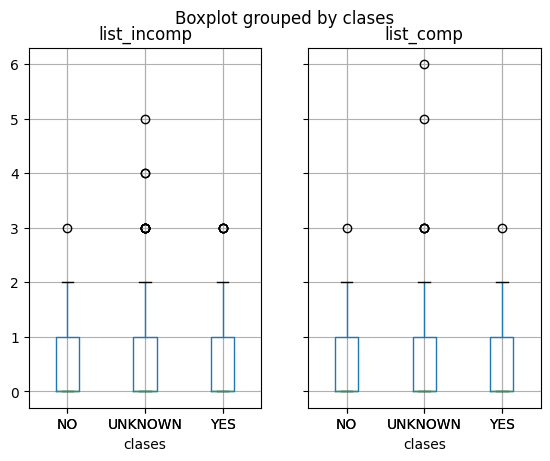

In [8]:
train.boxplot(by="clases",column=["list_incomp","list_comp"])

## Eliminar características

In [9]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["list_relaciones","listas_malignf","listas_malign","bi_ent_trip_t","bi_ent_trip_h"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,list_cuatrigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000000,0.000000,2.071,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,0.000000,0.000000,1.0,0.605426,1.5,0.241085,0.5,0.389922,1.5,YES
1,0.000000,0.000000,1.877,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,0.333333,0.000000,0.0,0.547619,3.0,0.000000,0.0,0.468254,0.5,NO
2,0.000000,0.000000,2.703,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,0.428571,0.000000,1.0,0.587589,4.5,0.000000,0.0,0.587589,4.5,UNKNOWN
3,0.000000,0.000000,2.632,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,0.000000,0.000000,0.0,0.630592,1.5,0.000000,0.0,0.630592,1.5,YES
4,-0.221468,276.119690,2.530,1.132,2.044573e+00,0.001367,0.115592,-0.106360,0,0,...,0.000000,0.080000,1.0,0.569630,4.0,0.000000,0.0,0.569630,4.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.501920,156.604034,2.689,2.565,4.006609e+00,0.002715,0.576517,0.293338,0,0,...,0.000000,0.038462,0.5,0.548077,3.5,0.000000,0.0,0.493590,3.0,UNKNOWN
796,2.915811,132.309708,2.440,1.688,3.952492e+00,0.002748,0.231415,0.175794,0,0,...,0.090909,0.026316,0.6,0.590226,6.5,0.000000,0.0,0.525815,4.0,YES
797,0.000000,145.867004,2.544,0.000,1.521449e-12,0.000000,0.000000,0.000000,0,0,...,0.166667,0.031250,0.0,0.546296,4.0,0.214120,0.5,0.451389,3.0,UNKNOWN
798,0.000000,0.000000,2.617,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,0.000000,0.000000,1.0,0.543771,4.0,0.000000,0.0,0.402357,2.5,NO


In [10]:
train=train.drop(["max_info","similitud_faltantes","list_trigram","list_cuatrigram","diferencias",'list_M', 'list_m', 'list_T',"list_rel_con"],axis=1)

In [11]:
#train["Shape Origin"] = train["Shape Origin"] / train["Total T"]
#train["Shape Finish"] = train["Shape Finish"] / train["Total T"]

In [12]:
#train=train.drop(["Total T"],axis=1)

In [13]:
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,list_comp,list_incomp,list_bigram,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000000,0.000000,2.071,0.000,0.000000e+00,0.000000,0,0,0.000000,1.0,0.605426,1.5,0.241085,0.5,0.389922,1.5,YES
1,0.000000,0.000000,1.877,0.000,0.000000e+00,0.000000,1,1,0.600000,0.0,0.547619,3.0,0.000000,0.0,0.468254,0.5,NO
2,0.000000,0.000000,2.703,0.000,0.000000e+00,0.000000,1,1,0.555556,1.0,0.587589,4.5,0.000000,0.0,0.587589,4.5,UNKNOWN
3,0.000000,0.000000,2.632,0.000,0.000000e+00,0.000000,0,0,0.500000,0.0,0.630592,1.5,0.000000,0.0,0.630592,1.5,YES
4,-0.221468,276.119690,2.530,1.132,2.044573e+00,0.001367,0,0,0.375000,1.0,0.569630,4.0,0.000000,0.0,0.569630,4.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.501920,156.604034,2.689,2.565,4.006609e+00,0.002715,0,0,0.285714,0.5,0.548077,3.5,0.000000,0.0,0.493590,3.0,UNKNOWN
796,2.915811,132.309708,2.440,1.688,3.952492e+00,0.002748,0,0,0.538462,0.6,0.590226,6.5,0.000000,0.0,0.525815,4.0,YES
797,0.000000,145.867004,2.544,0.000,1.521449e-12,0.000000,0,0,0.375000,0.0,0.546296,4.0,0.214120,0.5,0.451389,3.0,UNKNOWN
798,0.000000,0.000000,2.617,0.000,0.000000e+00,0.000000,0,0,0.375000,1.0,0.543771,4.0,0.000000,0.0,0.402357,2.5,NO


In [14]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [15]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [16]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,list_comp,list_incomp,list_bigram,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura
sumas,1.000000,0.379173,0.168230,0.784413,0.751821,0.277075,-0.021375,0.025489,-0.232538,-0.256717,-0.317719,0.022897,0.037619,0.067092,-0.162515,0.058490
distancias,0.379173,1.000000,0.117371,0.560020,0.459983,0.259939,0.170816,0.225537,-0.375492,-0.359667,-0.419031,0.105116,0.056333,0.080754,-0.224069,0.173533
entropia_total,0.168230,0.117371,1.000000,0.149967,0.123794,0.064677,0.056502,0.110514,-0.011296,-0.124602,-0.020816,0.193208,0.095385,0.084895,0.210921,0.261666
entropias,0.784413,0.560020,0.149967,1.000000,0.968785,0.405115,0.015218,0.046331,-0.358045,-0.330922,-0.376076,-0.059129,-0.011225,0.009174,-0.201567,-0.024655
mutinf,0.751821,0.459983,0.123794,0.968785,1.000000,0.396825,-0.025129,0.009642,-0.317701,-0.283181,-0.330558,-0.076779,-0.029395,-0.014646,-0.178091,-0.055268
mearts,0.277075,0.259939,0.064677,0.405115,0.396825,1.000000,0.031709,0.029556,-0.174019,-0.162223,-0.215336,-0.037548,-0.025962,-0.023562,-0.099369,-0.017760
list_comp,-0.021375,0.170816,0.056502,0.015218,-0.025129,0.031709,1.000000,0.680570,-0.239258,-0.208676,-0.177706,0.092514,0.139806,0.169083,-0.083207,0.161016
list_incomp,0.025489,0.225537,0.110514,0.046331,0.009642,0.029556,0.680570,1.000000,-0.287405,-0.224963,-0.240256,0.071303,0.166289,0.199272,-0.132529,0.145390
list_bigram,-0.232538,-0.375492,-0.011296,-0.358045,-0.317701,-0.174019,-0.239258,-0.287405,1.000000,0.507265,0.626611,0.179106,0.009024,-0.017783,0.440239,0.135487
bi_ent_trip_rel,-0.256717,-0.359667,-0.124602,-0.330922,-0.283181,-0.162223,-0.208676,-0.224963,0.507265,1.000000,0.474141,0.082535,0.007587,-0.001739,0.239240,0.028140


<Axes: >

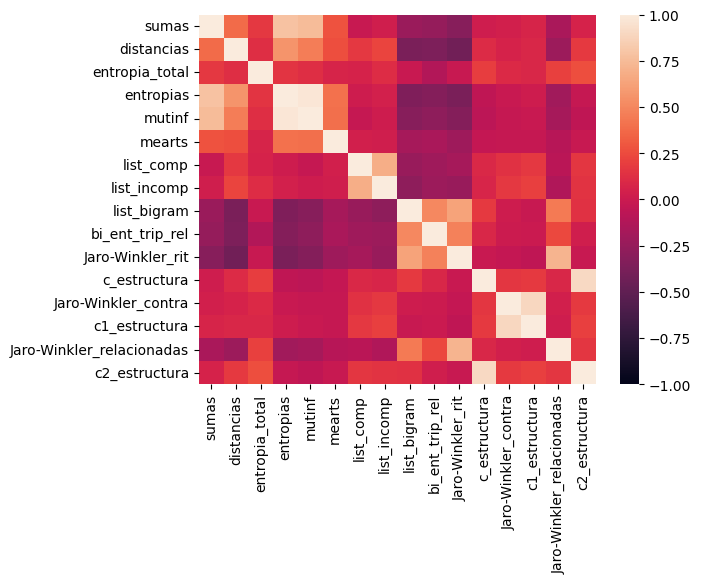

In [17]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [18]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,list_comp,list_incomp,list_bigram,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura
sumas,1.000000,0.379173,0.168230,0.784413,0.751821,0.277075,-0.021375,0.025489,-0.232538,-0.256717,-0.317719,0.022897,0.037619,0.067092,-0.162515,0.058490
distancias,0.379173,1.000000,0.117371,0.560020,0.459983,0.259939,0.170816,0.225537,-0.375492,-0.359667,-0.419031,0.105116,0.056333,0.080754,-0.224069,0.173533
entropia_total,0.168230,0.117371,1.000000,0.149967,0.123794,0.064677,0.056502,0.110514,-0.011296,-0.124602,-0.020816,0.193208,0.095385,0.084895,0.210921,0.261666
entropias,0.784413,0.560020,0.149967,1.000000,0.968785,0.405115,0.015218,0.046331,-0.358045,-0.330922,-0.376076,-0.059129,-0.011225,0.009174,-0.201567,-0.024655
mutinf,0.751821,0.459983,0.123794,0.968785,1.000000,0.396825,-0.025129,0.009642,-0.317701,-0.283181,-0.330558,-0.076779,-0.029395,-0.014646,-0.178091,-0.055268
mearts,0.277075,0.259939,0.064677,0.405115,0.396825,1.000000,0.031709,0.029556,-0.174019,-0.162223,-0.215336,-0.037548,-0.025962,-0.023562,-0.099369,-0.017760
list_comp,-0.021375,0.170816,0.056502,0.015218,-0.025129,0.031709,1.000000,0.680570,-0.239258,-0.208676,-0.177706,0.092514,0.139806,0.169083,-0.083207,0.161016
list_incomp,0.025489,0.225537,0.110514,0.046331,0.009642,0.029556,0.680570,1.000000,-0.287405,-0.224963,-0.240256,0.071303,0.166289,0.199272,-0.132529,0.145390
list_bigram,-0.232538,-0.375492,-0.011296,-0.358045,-0.317701,-0.174019,-0.239258,-0.287405,1.000000,0.507265,0.626611,0.179106,0.009024,-0.017783,0.440239,0.135487
bi_ent_trip_rel,-0.256717,-0.359667,-0.124602,-0.330922,-0.283181,-0.162223,-0.208676,-0.224963,0.507265,1.000000,0.474141,0.082535,0.007587,-0.001739,0.239240,0.028140


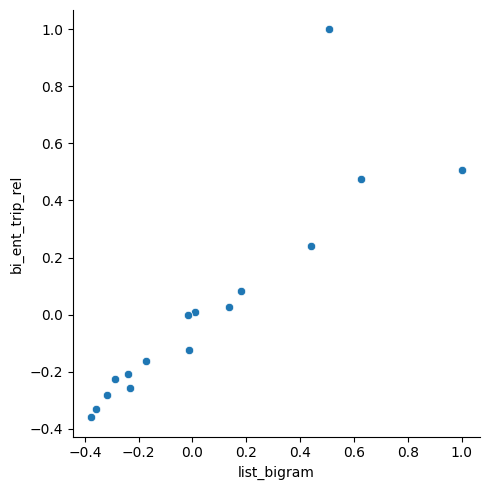

In [19]:
# Checar variables colineales
sns.relplot(data=train_m, x="list_bigram", y="bi_ent_trip_rel")

In [20]:
# RTE3
y_train=[]
c_y=0
c_u=0
c_n=0
for i in y_:
    if i == "YES":
        y_train.append(1)
        c_y+=1
    elif i=="UNKNOWN":
        y_train.append(2)
        c_u+=1
    elif i=="NO":
        y_train.append(0)
        c_n+=1
    else:
        print("ora",i)

In [21]:
print(c_y,c_u,c_n)

412 308 80


In [22]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

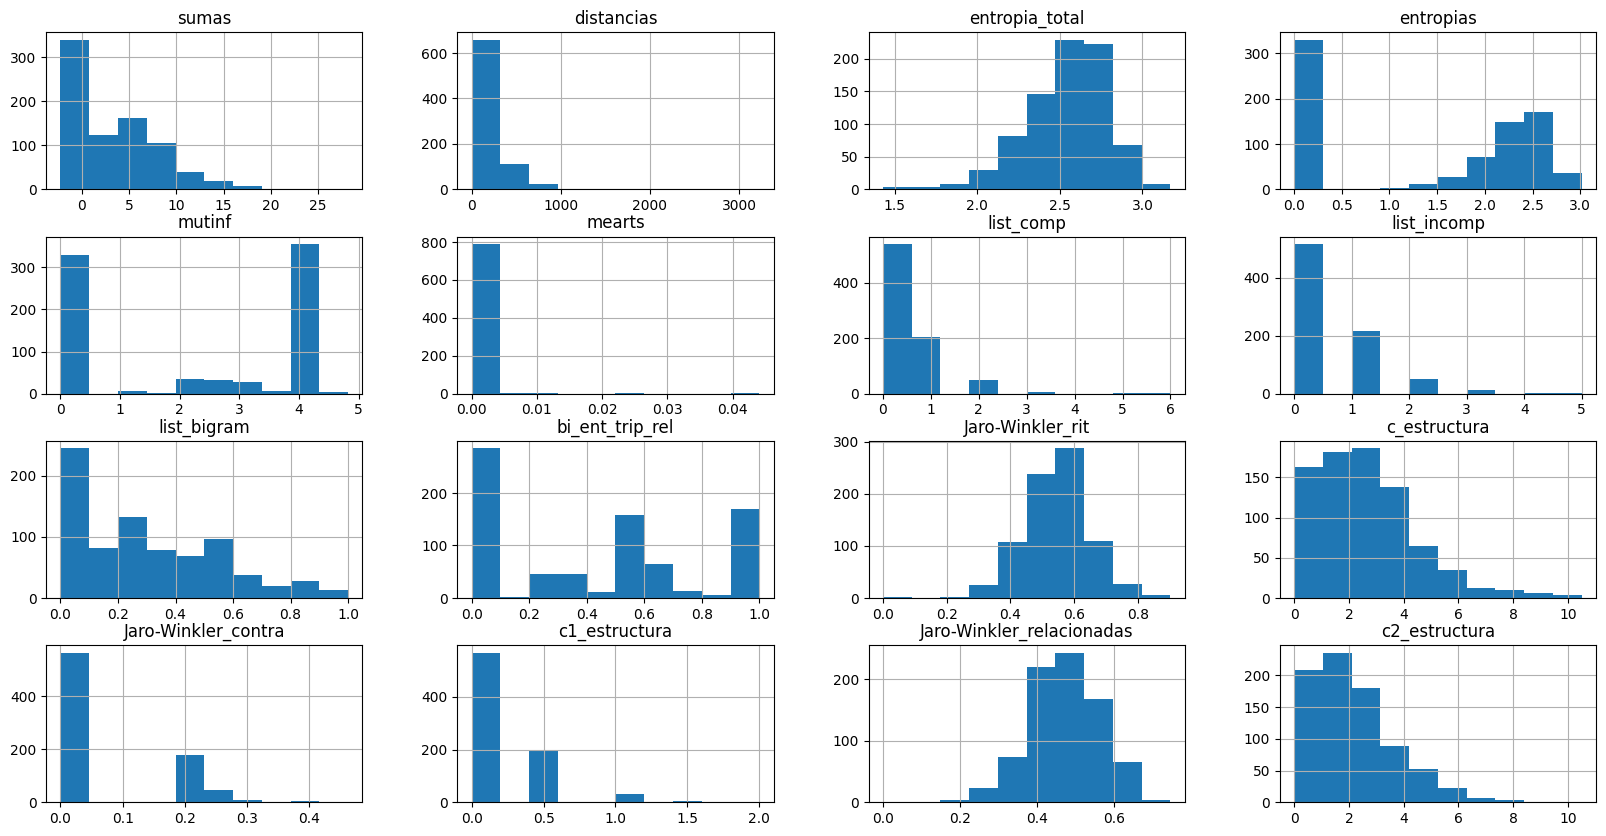

In [23]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [24]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/prueba/RTE3/anterior_chida/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        temp = pd.read_pickle('salida/prueba/RTE3/anterior_chida/TEST_'+str(i+1)+'.csv_.pickle')
        test=pd.concat([test,temp])

In [25]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000000,0.000000,2.375,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,0,...,"[French movie, movie director, chilling tales,...","[Beau Serge, Chabrol, Beau Serge was directed ...",0.333333,0.563063,3.5,0.000000,0.0,0.434846,1.5,YES
1,0.000000,129.894150,2.224,0.000,1.521449e-12,0.000000,0.000000,0.000000,1,1,...,"[French movie, movie director, chilling tales,...","[French movie, movie director, Le Boucher, Le ...",0.750000,0.505405,4.0,0.000000,0.0,0.486873,3.0,YES
2,0.000000,0.000000,0.722,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,"[Claude Chabrol, Agnes, Stéphane Audran, Auror...","[Aurore Paquiss, Chabrol, Aurore Paquiss marri...",0.333333,0.570175,2.0,0.267544,0.5,0.267544,0.5,YES
3,0.000000,0.000000,2.542,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,"[small Maoist, Maoist political, political par...","[Maoist political, political party, Michael La...",1.000000,0.596491,5.5,0.000000,0.0,0.518341,4.5,YES
4,6.383789,138.847382,2.453,2.475,3.915644e+00,0.004324,0.412710,0.347696,0,0,...,"[small Maoist, Maoist political, political par...","[Michael Laski, China]",1.000000,0.532790,2.5,0.223058,0.5,0.433897,1.5,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,2.488,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,"[risk destabilising, led Chinese, Chinese econ...","[led economy, China, China has economy ]",0.000000,0.609610,2.0,0.295796,1.0,0.609610,2.0,YES
796,0.000000,0.000000,2.969,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,"[saw exports, services rise, imports gained, U...","[exports rose, US]",0.500000,0.637387,1.5,0.231231,0.5,0.656156,0.0,NO
797,9.458171,200.796814,2.599,2.499,3.976425e+00,0.002651,0.467463,0.482878,0,0,...,"[largest consumer, imports rose, crude hitting...","[Israel, Lebanon]",1.000000,0.503999,3.0,0.000000,0.0,0.503999,3.0,UNKNOWN
798,3.272335,165.737167,2.443,1.969,3.985115e+00,0.003217,0.353093,0.263597,0,0,...,"[Olympic site, alien presence, Forbidden City]",[Forbidden City],1.000000,0.611111,4.5,0.265432,1.0,0.561728,4.0,UNKNOWN


In [26]:
test=test.drop(["list_relaciones","listas_malign","listas_malignf","bi_ent_trip_t","bi_ent_trip_h"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,list_cuatrigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000000,0.000000,2.375,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,0,...,0.000000,0.000000,0.333333,0.563063,3.5,0.000000,0.0,0.434846,1.5,YES
1,0.000000,129.894150,2.224,0.000,1.521449e-12,0.000000,0.000000,0.000000,1,1,...,0.142857,0.027027,0.750000,0.505405,4.0,0.000000,0.0,0.486873,3.0,YES
2,0.000000,0.000000,0.722,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,0.000000,0.000000,0.333333,0.570175,2.0,0.267544,0.5,0.267544,0.5,YES
3,0.000000,0.000000,2.542,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,0.125000,0.000000,1.000000,0.596491,5.5,0.000000,0.0,0.518341,4.5,YES
4,6.383789,138.847382,2.453,2.475,3.915644e+00,0.004324,0.412710,0.347696,0,0,...,0.000000,0.026316,1.000000,0.532790,2.5,0.223058,0.5,0.433897,1.5,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,2.488,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,0.000000,0.000000,0.000000,0.609610,2.0,0.295796,1.0,0.609610,2.0,YES
796,0.000000,0.000000,2.969,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,0.000000,0.000000,0.500000,0.637387,1.5,0.231231,0.5,0.656156,0.0,NO
797,9.458171,200.796814,2.599,2.499,3.976425e+00,0.002651,0.467463,0.482878,0,0,...,0.166667,0.023256,1.000000,0.503999,3.0,0.000000,0.0,0.503999,3.0,UNKNOWN
798,3.272335,165.737167,2.443,1.969,3.985115e+00,0.003217,0.353093,0.263597,0,0,...,0.166667,0.037037,1.000000,0.611111,4.5,0.265432,1.0,0.561728,4.0,UNKNOWN


In [27]:
test=test.drop(["max_info","similitud_faltantes","list_trigram","list_cuatrigram","diferencias",'list_M', 'list_m', 'list_T',"list_rel_con"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,list_comp,list_incomp,list_bigram,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000000,0.000000,2.375,0.000,0.000000e+00,0.000000,1,0,0.166667,0.333333,0.563063,3.5,0.000000,0.0,0.434846,1.5,YES
1,0.000000,129.894150,2.224,0.000,1.521449e-12,0.000000,1,1,0.333333,0.750000,0.505405,4.0,0.000000,0.0,0.486873,3.0,YES
2,0.000000,0.000000,0.722,0.000,0.000000e+00,0.000000,1,1,0.333333,0.333333,0.570175,2.0,0.267544,0.5,0.267544,0.5,YES
3,0.000000,0.000000,2.542,0.000,0.000000e+00,0.000000,0,0,0.500000,1.000000,0.596491,5.5,0.000000,0.0,0.518341,4.5,YES
4,6.383789,138.847382,2.453,2.475,3.915644e+00,0.004324,0,0,0.333333,1.000000,0.532790,2.5,0.223058,0.5,0.433897,1.5,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,2.488,0.000,0.000000e+00,0.000000,0,0,0.200000,0.000000,0.609610,2.0,0.295796,1.0,0.609610,2.0,YES
796,0.000000,0.000000,2.969,0.000,0.000000e+00,0.000000,0,0,0.400000,0.500000,0.637387,1.5,0.231231,0.5,0.656156,0.0,NO
797,9.458171,200.796814,2.599,2.499,3.976425e+00,0.002651,0,0,0.375000,1.000000,0.503999,3.0,0.000000,0.0,0.503999,3.0,UNKNOWN
798,3.272335,165.737167,2.443,1.969,3.985115e+00,0.003217,0,0,0.500000,1.000000,0.611111,4.5,0.265432,1.0,0.561728,4.0,UNKNOWN


In [28]:
#test["Shape Origin"] = test["Shape Origin"] / test["Total T"]
#test["Shape Finish"] = test["Shape Finish"] / test["Total T"]

In [29]:
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,list_comp,list_incomp,list_bigram,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000000,0.000000,2.375,0.000,0.000000e+00,0.000000,1,0,0.166667,0.333333,0.563063,3.5,0.000000,0.0,0.434846,1.5,YES
1,0.000000,129.894150,2.224,0.000,1.521449e-12,0.000000,1,1,0.333333,0.750000,0.505405,4.0,0.000000,0.0,0.486873,3.0,YES
2,0.000000,0.000000,0.722,0.000,0.000000e+00,0.000000,1,1,0.333333,0.333333,0.570175,2.0,0.267544,0.5,0.267544,0.5,YES
3,0.000000,0.000000,2.542,0.000,0.000000e+00,0.000000,0,0,0.500000,1.000000,0.596491,5.5,0.000000,0.0,0.518341,4.5,YES
4,6.383789,138.847382,2.453,2.475,3.915644e+00,0.004324,0,0,0.333333,1.000000,0.532790,2.5,0.223058,0.5,0.433897,1.5,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,2.488,0.000,0.000000e+00,0.000000,0,0,0.200000,0.000000,0.609610,2.0,0.295796,1.0,0.609610,2.0,YES
796,0.000000,0.000000,2.969,0.000,0.000000e+00,0.000000,0,0,0.400000,0.500000,0.637387,1.5,0.231231,0.5,0.656156,0.0,NO
797,9.458171,200.796814,2.599,2.499,3.976425e+00,0.002651,0,0,0.375000,1.000000,0.503999,3.0,0.000000,0.0,0.503999,3.0,UNKNOWN
798,3.272335,165.737167,2.443,1.969,3.985115e+00,0.003217,0,0,0.500000,1.000000,0.611111,4.5,0.265432,1.0,0.561728,4.0,UNKNOWN


In [30]:
#test=test.drop(["Total T"],axis=1)

In [31]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [32]:
# RTE3
y_test=[]
tc_y=0
tc_u=0
tc_n=0
for i in y_t:
    if i == "YES":
        y_test.append(1)
        tc_y+=1
    elif i=="UNKNOWN":
        y_test.append(2)
        tc_u+=1
    elif i=="NO":
        y_test.append(0)
        tc_n+=1
    else:
        print("q",i)

In [33]:
print(tc_y,tc_u,tc_n)

410 318 72


In [34]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [35]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [36]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [37]:
#X_train = np.where(np.isnan(X_train), 0, X_train)
#X_train

In [38]:
X_train.shape

(800, 16)

In [39]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [40]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [41]:
model.decision_function(X)

array([[-0.51275283,  1.03397352, -0.52122069],
       [-0.68843007,  0.4987482 ,  0.18968187],
       [-0.97755757,  1.43318262, -0.45562505],
       ...,
       [-0.64753842,  0.5220596 ,  0.12547882],
       [-0.76867198,  1.17953668, -0.4108647 ],
       [-1.09818339,  1.05120225,  0.04698114]])

In [42]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'list_comp', 'list_incomp', 'list_bigram', 'bi_ent_trip_rel',
       'Jaro-Winkler_rit', 'c_estructura', 'Jaro-Winkler_contra',
       'c1_estructura', 'Jaro-Winkler_relacionadas', 'c2_estructura'],
      dtype='object')

In [43]:
model.classes_

array([0, 1, 2])

In [44]:
model.coef_[0]

array([-0.82100353, -0.26804516, -0.20162134, -0.30835846,  0.32044926,
       -0.18389966, -0.45090608, -0.24787456,  0.28600102,  0.06352104,
        0.66111058,  0.20528955,  0.20983832,  0.5442246 ,  0.00479552,
       -0.91025846])

In [45]:
coeficientes=model.coef_[0]

In [46]:
coeficientes

array([-0.82100353, -0.26804516, -0.20162134, -0.30835846,  0.32044926,
       -0.18389966, -0.45090608, -0.24787456,  0.28600102,  0.06352104,
        0.66111058,  0.20528955,  0.20983832,  0.5442246 ,  0.00479552,
       -0.91025846])

In [47]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  10 Jaro-Winkler_rit 15 c2_estructura


In [48]:
n_columns=train.shape[1]-1

In [49]:
n_columns

16

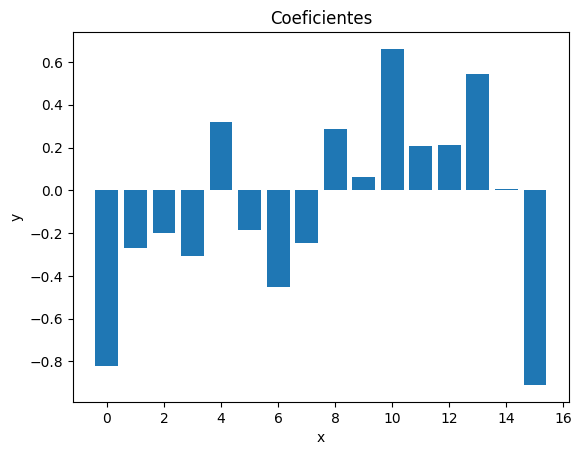

In [50]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [51]:
#X_test = np.where(np.isnan(X_test), 0, X_test)
#X_test

In [52]:
X_test.shape

(800, 16)

In [53]:
predictions = model.predict(X_test)

In [54]:
print(confusion_matrix(y_test, predictions,labels=[1,2,0]))

[[316  94   0]
 [126 192   0]
 [ 63   9   0]]


In [56]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average='macro'),2))
print("recall",round(recall_score(y_test,predictions,average='macro'),2))
print("f1_score: ",round(f1_score(y_test,predictions,average='macro'),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.64
precision:  0.43
recall 0.46
f1_score:  0.44
matthews_score:  0.32


/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
X_train.shape

(800, 16)

In [58]:
X_test.shape

(800, 16)

In [59]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [60]:
validation_size = 0.20
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [61]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.660000 (0.052362)
Logistic Regression Precision:: 0.650000 (0.053746)
Logistic Regression Recall:: 0.650000 (0.035416)
Logistic Regression F1-score:: 0.650000 (0.052455)


In [62]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.310000 (0.211434)


In [64]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [65]:
#linear_model

In [66]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [67]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      0.77      0.69       410
           2       0.65      0.60      0.63       318

    accuracy                           0.64       800
   macro avg       0.43      0.46      0.44       800
weighted avg       0.58      0.64      0.60       800



In [71]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [72]:
test.columns[:-1]

Index(['entropia_total', 'mutinf', 'mearts', 'list_comp', 'list_incomp',
       'list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram',
       'bi_ent_trip_rel'],
      dtype='object')

In [73]:
explainer.expected_value

array([-0.98546567,  0.56865368,  0.41681199])

In [74]:
X_test

array([[7.74624918e-01, 0.00000000e+00, 0.00000000e+00, ...,
        3.39449541e-01, 1.66666667e-01, 3.33333333e-01],
       [7.25375082e-01, 3.13176078e-13, 0.00000000e+00, ...,
        3.39449541e-01, 3.33333333e-01, 7.50000000e-01],
       [2.35485975e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.74311927e-01, 3.33333333e-01, 3.33333333e-01],
       ...,
       [8.47684279e-01, 8.18510080e-01, 6.01126727e-02, ...,
        3.94495413e-01, 3.75000000e-01, 1.00000000e+00],
       [7.96803653e-01, 8.20298865e-01, 7.29390442e-02, ...,
        2.47706422e-01, 5.00000000e-01, 1.00000000e+00],
       [8.41161122e-01, 3.13176078e-13, 0.00000000e+00, ...,
        2.01834862e-01, 3.00000000e-01, 5.00000000e-01]])

In [75]:
shap.plots.beeswarm(shap_values)

ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!

In [76]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.54533594 0.82276753 0.04861899 0.         0.         0.
 0.20689655 0.07142857 0.30275229 0.2        0.66666667] 2 1


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

[0.73026745 0.         0.         0.         0.         0.
 0.24137931 0.         0.30275229 0.33333333 0.66666667]


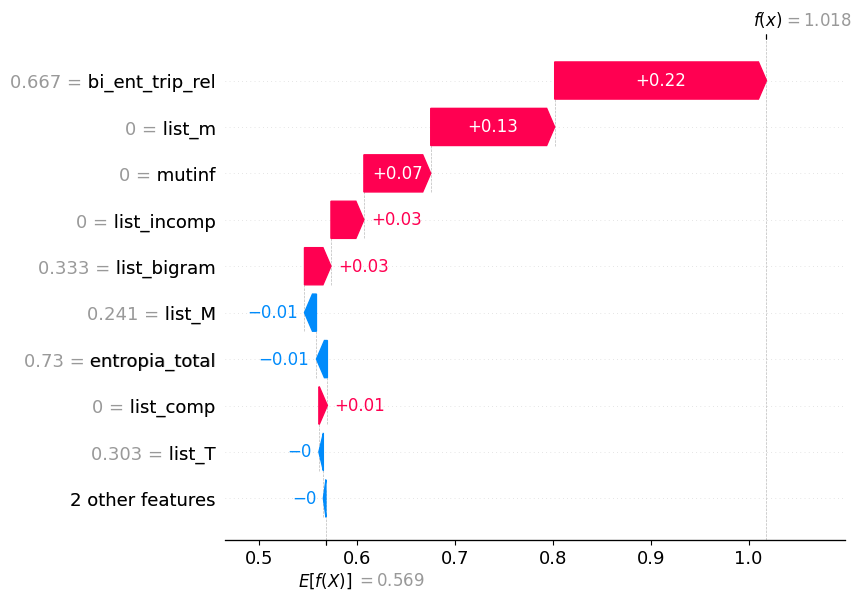

In [77]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

TypeError: only integer scalar arrays can be converted to a scalar index

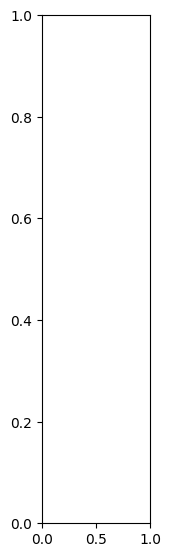

In [78]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

TypeError: only integer scalar arrays can be converted to a scalar index

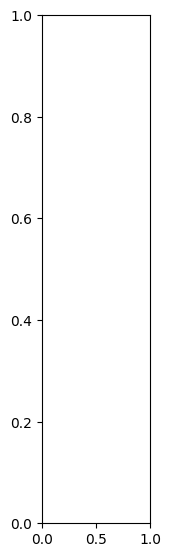

In [79]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

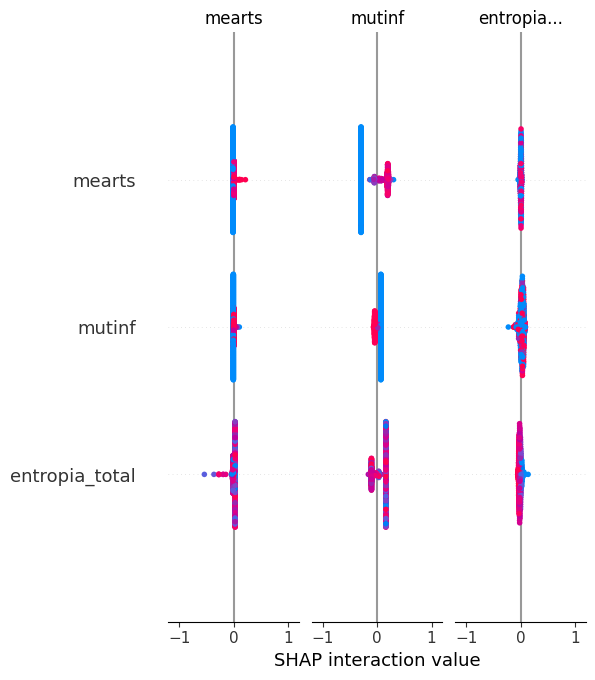

In [80]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [81]:
shap_values[2:,]

.values =
array([[[ 0.13709554, -0.11328552, -0.02381002],
        [ 0.07993696,  0.06819672, -0.14813368],
        [ 0.01353529, -0.00263965, -0.01089564],
        ...,
        [ 0.12457527, -0.11323805, -0.01133722],
        [ 0.03258107,  0.02702275, -0.05960382],
        [ 0.00252817,  0.01195094, -0.01447912]],

       [[-0.01117425,  0.00923357,  0.00194068],
        [ 0.07993696,  0.06819672, -0.14813368],
        [ 0.01353529, -0.00263965, -0.01089564],
        ...,
        [-0.03766058,  0.0342332 ,  0.00342737],
        [ 0.11207595,  0.09295582, -0.20503178],
        [ 0.08890872,  0.42028097, -0.50918969]],

       [[-0.0039237 ,  0.00324225,  0.00068145],
        [-0.04984533, -0.04252461,  0.09236994],
        [-0.0141334 ,  0.00275629,  0.01137711],
        ...,
        [-0.03766058,  0.0342332 ,  0.00342737],
        [ 0.03258107,  0.02702275, -0.05960382],
        [ 0.08890872,  0.42028097, -0.50918969]],

       ...,

       [[-0.01581787,  0.0130707 ,  0.00274716],
 

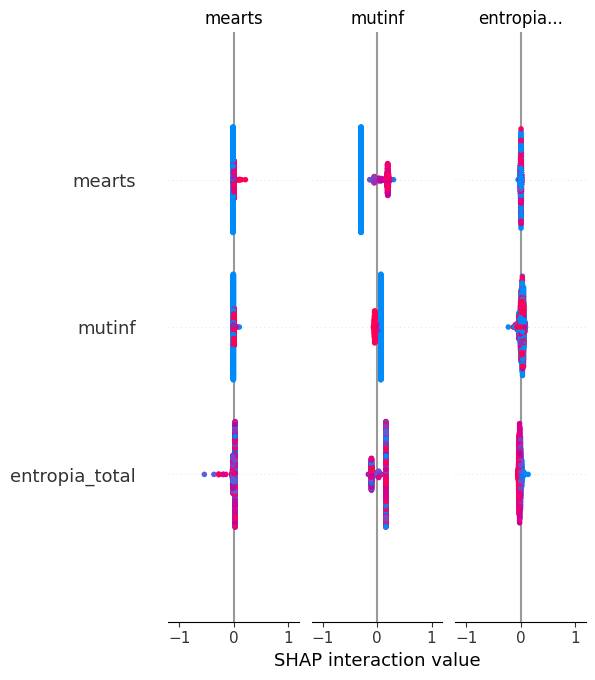

In [82]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [83]:
explainer.expected_value

array([-0.98546567,  0.56865368,  0.41681199])

In [84]:
shap_values.shape

(800, 11, 3)

# Árbol de decisión

In [85]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [86]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [88]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred,average="weighted"),2))
print("recall",round(recall_score(y_test,y_pred,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,y_pred,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred,average="weighted"),2))

acccuracy:  0.5
precision:  0.51
recall 0.5
f1_score:  0.5


TypeError: got an unexpected keyword argument 'average'

In [89]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [90]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File "/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 2131, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 187, in wrapper
    return func(*args, **kwargs)
  File "/home/david/ana

DecisionTree: nan (nan)
DecisionTree: nan (nan)
DecisionTree: nan (nan)


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File "/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1239, in f1_score
    return fbeta_score(
  File "/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 187, in wrapper
    return func(*args, **kwargs)
  File "/home/david/anaconda3/envs/rit/lib/python3.9/sit

In [92]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred,labels=[1,2,0])

array([[248, 119,  43],
       [139, 147,  32],
       [ 50,  15,   7]])

Profundidad del árbol: 22
Número de nodos terminales: 362


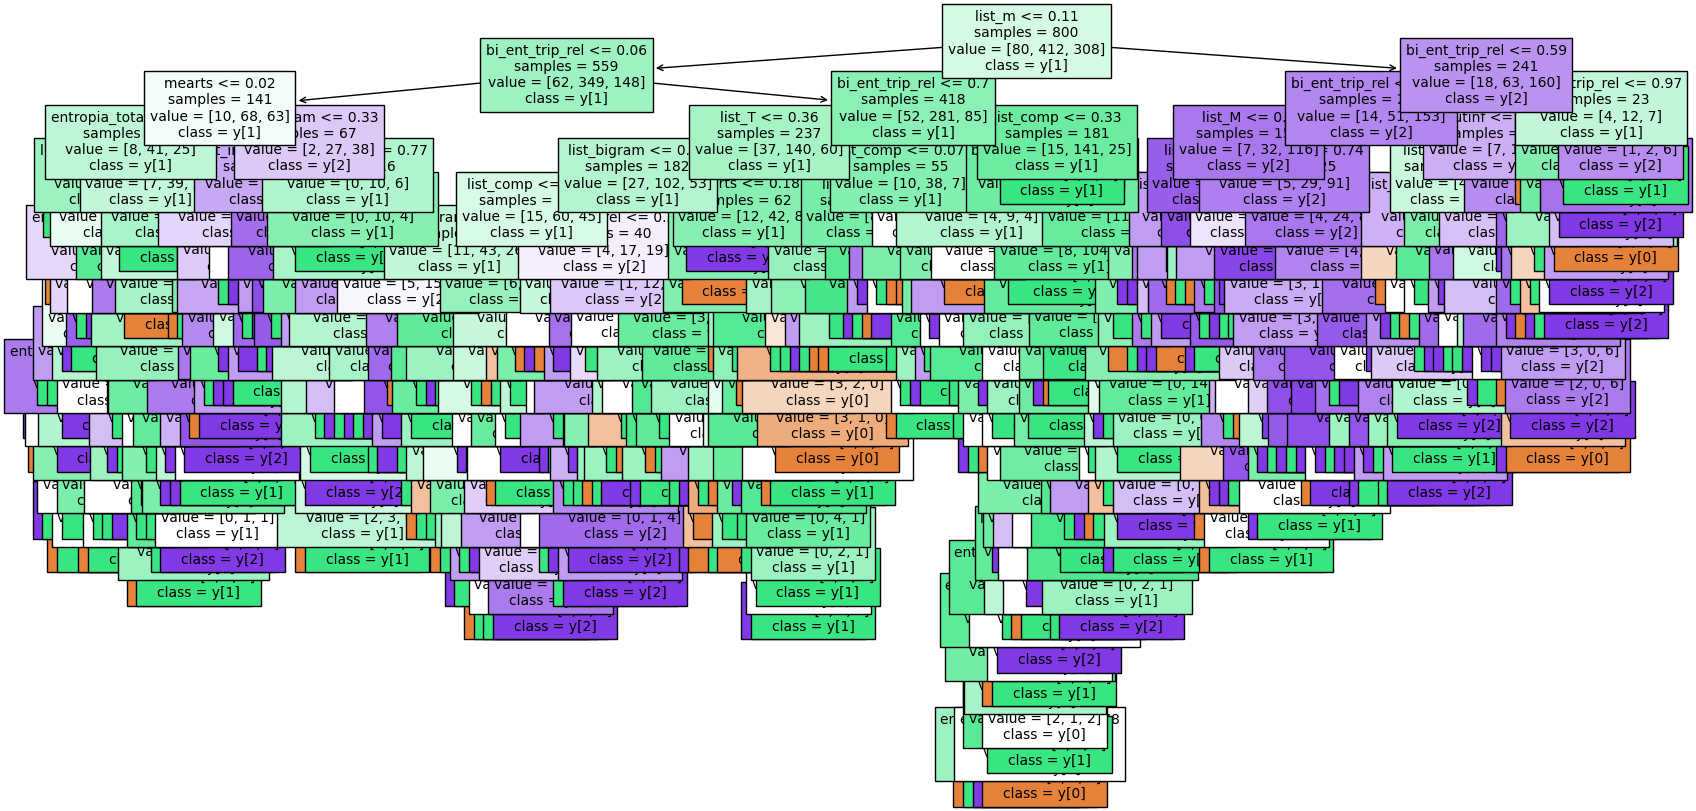

In [93]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )